# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [640]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [641]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [642]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [643]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [644]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [645]:
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
sns.set_style('whitegrid')

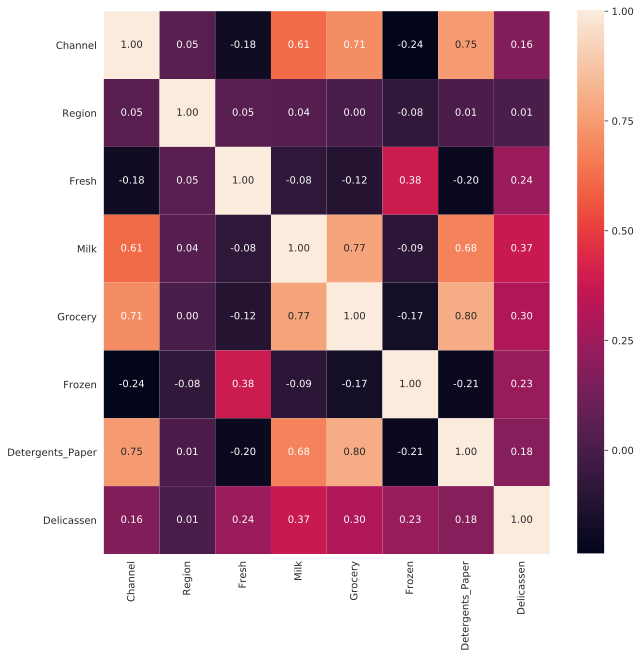

In [646]:
# Plot de correlación son seaborn metodo de spearman
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

sns.heatmap(customers.corr(method='spearman'), annot=True, fmt='.2f', ax=ax);

In [647]:
customers['Channel'].unique()

array([2, 1])

In [648]:
customers['Region'].unique()

array([3, 1, 2])

In [649]:
customers.drop(['Channel','Region'], axis = 1, inplace = True)
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


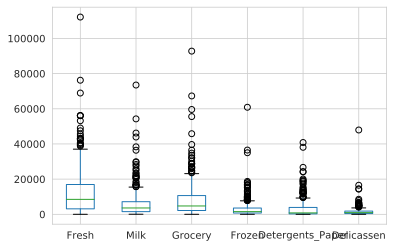

In [650]:
customers.plot(kind='box');

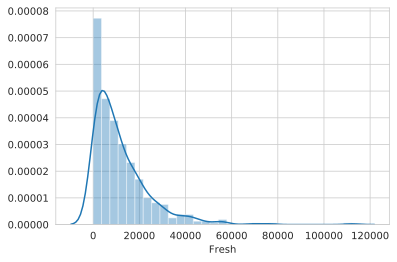

In [651]:
sns.distplot(customers['Fresh']);

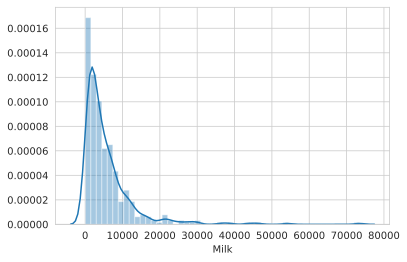

In [652]:
sns.distplot(customers['Milk']);


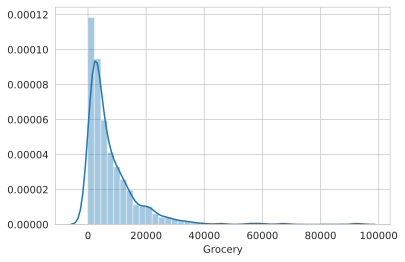

In [653]:
sns.distplot(customers['Grocery']);

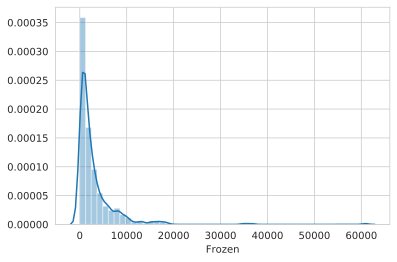

In [654]:
sns.distplot(customers['Frozen']);

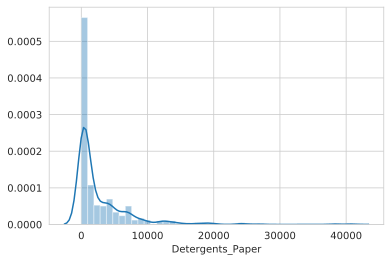

In [655]:
sns.distplot(customers['Detergents_Paper']);

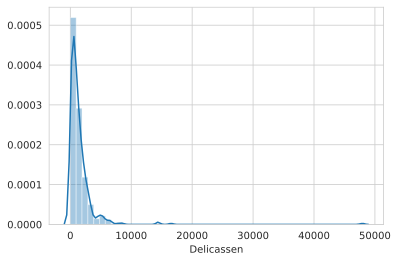

In [656]:

sns.distplot(customers['Delicassen']);

In [657]:
# I prepare the data for the Pareto chart

a = pd.DataFrame(sum.index)#.rename(columns={'0'= 'A'})
a['Customers_preferences']= a
a.drop([0], axis = 1, inplace = True)
b = pd.DataFrame(df.sum()).reset_index()
b.rename(columns={"index": "Primera", 0: "B"}, inplace  = True)
b.drop(['Primera'], axis = 1, inplace = True)
df_sum = pd.concat([a, b], axis = 1)
df_sum.rename(columns={0: "A", 0: "B"})
df_sum

,Customers_preferences,B
0,Fresh,5280131
1,Milk,2550357
2,Grocery,3498562
3,Frozen,1351650
4,Detergents_Paper,1267857
5,Delicassen,670943


In [658]:
# Function to plot pareto diagram

from matplotlib.ticker import PercentFormatter

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()
    

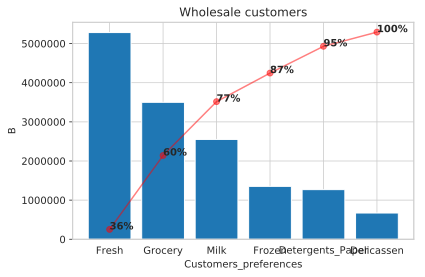

In [659]:
pareto_plot(df_sum, x='Customers_preferences', y='B', title='Wholesale customers')

### The data completes the Pareto principle approximately.


# Your observations here


Explore the dataset with mathematical and visualization techniques. What do you find?
Checklist:


It is the wholesale consumption of customers by region and purchase channel.

## Any categorical data to convert?
No, all data is numerical.

## Any missing information to delete?
All columns are checked and there are no nulls, there is no data to delete.

## Collinearity of column: any high correlation?
There is a relatively high correlation between the following columns:
Grocery - Detergents_paper (0.8)
Milk - Grocery (0.77)
Chanel - Detergents_paper (0.75)
Chanel - Grocery (0.71)
Chanel - Milk (0.61)

## Descriptive statistics: are there outliers to eliminate?
Yes, there are outliers to remove

## Column-level data distribution: Is the distribution skewed?
Looking at the graphs, it can be seen that the distribution is skewed.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [660]:
# Your code here
# Remove outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

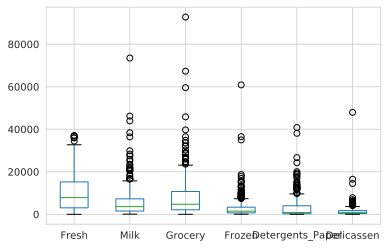

In [661]:
fresh = remove_outlier(customers, 'Fresh')
fresh.plot(kind='box');

In [662]:
milk = remove_outlier(fresh, 'Milk')
milk

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
434,16731,3922,7994,688,2371,838
435,29703,12051,16027,13135,182,2204
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [663]:
frozen = remove_outlier(milk, 'Frozen')
frozen

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
433,1982,3218,1493,1541,356,1449
434,16731,3922,7994,688,2371,838
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [664]:
detergents_paper = remove_outlier(frozen, 'Detergents_Paper')
detergents_paper

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395
433,1982,3218,1493,1541,356,1449
434,16731,3922,7994,688,2371,838
438,10290,1981,2232,1038,168,2125


In [665]:
customers_remove_outliers = remove_outlier(detergents_paper, 'Delicassen')
customers_remove_outliers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395
433,1982,3218,1493,1541,356,1449
434,16731,3922,7994,688,2371,838
438,10290,1981,2232,1038,168,2125


# Your comment here

The data is clean, there are no nulls, all the columns are integers. 

Columns for 'Channel' and 'Region' have been removed

I have only removed the outliers from all the columns but I don't know if this was a good option.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [666]:
# Your import here:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Your code here:

# the target column is removed to perform scaling
data_pca = customers_remove_outliers[[x for x in customers_remove_outliers.columns if x != 'target_class']]


In [667]:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data_pca)

customers_scale

array([[ 0.38689363,  1.57624496,  0.27454973, -0.98363523,  0.25303361,
         0.44030535],
       [-0.30174328,  1.620706  ,  0.64794884, -0.01177773,  0.50474716,
         0.99603602],
       [ 0.46002756, -0.86622503, -0.34685187,  2.90253914, -0.62816716,
         1.01126152],
       ...,
       [ 0.88533326, -0.07920692,  0.35510868, -0.68605096,  0.12982003,
        -0.19409039],
       [ 0.09497146, -0.63958922, -0.7169021 , -0.46631574, -0.76601998,
         1.43884425],
       [-0.82570615, -0.72129359, -0.66518065, -1.07717965, -0.64036652,
        -1.19136049]])

In [668]:
pca = PCA().fit(customers_scale)

In [669]:
# principal axes in feature space, representing the directions of maximum variance in the data
# components sorted by variance ratio (eigenvalue / sum(eigenvalues)) -> How large the variance is in the new directions
pca.explained_variance_ratio_

array([0.45559932, 0.22230712, 0.13692191, 0.11495672, 0.05024978,
       0.01996515])

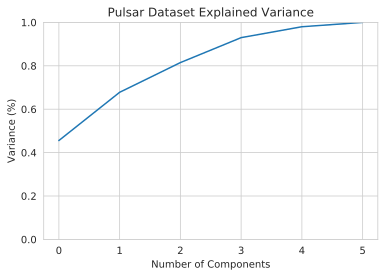

In [670]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.ylim([0,1])
plt.title('Pulsar Dataset Explained Variance')
plt.show()

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [681]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans().fit(customers_scale)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [682]:
customers['labels']= pd.DataFrame(kmeans.labels_)
customers['labels']

0      7.0
1      7.0
2      2.0
3      0.0
4      6.0
      ... 
435    NaN
436    NaN
437    NaN
438    NaN
439    NaN
Name: labels, Length: 440, dtype: float64

Count the values in `labels`.

In [683]:
# Your code here:
customers['labels'].value_counts()

4.0    82
3.0    42
2.0    42
1.0    35
0.0    35
7.0    34
6.0    33
5.0    26
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [684]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN().fit(customers_scale)

dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [689]:
customers['labels_DBSCAN']= pd.DataFrame(dbscan.labels_)

Count the values in `labels_DBSCAN`.

In [690]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1.0    289
 0.0     36
 1.0      4
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

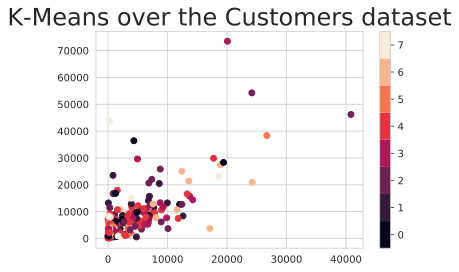

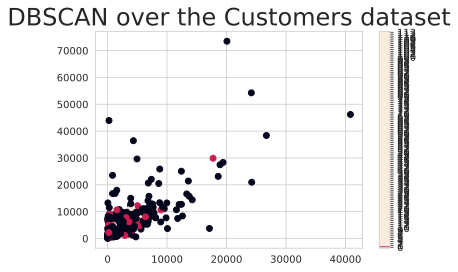

In [708]:
# Your code here:
labels = customers['labels']
labels_DBSCAN =customers['labels_DBSCAN']


plt.scatter(customers['Detergents_Paper'], customers['Milk'], c= labels)
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customers dataset', fontsize=24);
plt.show()


plt.scatter(customers['Detergents_Paper'], customers['Milk'], c= labels_DBSCAN,)
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('DBSCAN over the Customers dataset', fontsize=24);
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

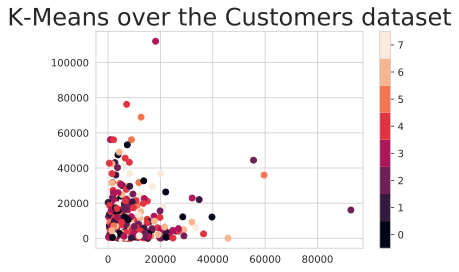

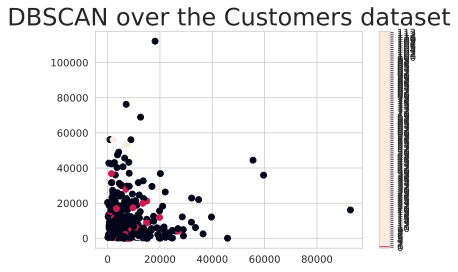

In [709]:
# Your code here:


plt.scatter(customers['Grocery'], customers['Fresh'], c= labels)
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customers dataset', fontsize=24);
plt.show()


plt.scatter(customers['Grocery'], customers['Fresh'], c= labels_DBSCAN,)
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('DBSCAN over the Customers dataset', fontsize=24);
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

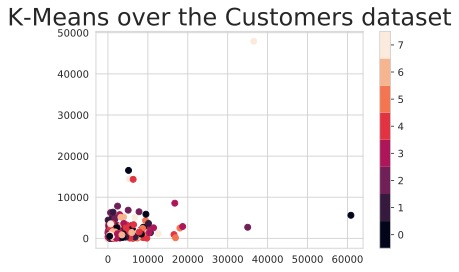

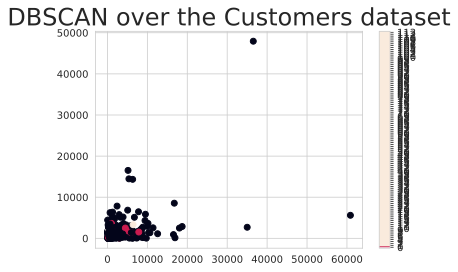

In [710]:
# Your code here:

plt.scatter(customers['Frozen'], customers['Delicassen'], c= labels)
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customers dataset', fontsize=24);
plt.show()


plt.scatter(customers['Frozen'], customers['Delicassen'], c= labels_DBSCAN,)
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('DBSCAN over the Customers dataset', fontsize=24);
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [712]:
# Your code here:
customers.groupby(['labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0.0,12765.200000,5571.514286,7073.000000,4640.142857,2206.942857,1856.742857,-0.942857
1.0,12220.657143,6222.771429,8101.028571,2711.600000,2691.800000,1332.257143,-1.000000
2.0,11003.000000,8658.761905,11422.809524,2937.928571,4418.261905,1975.976190,-1.000000
3.0,15153.666667,7120.190476,8575.714286,3192.904762,3344.857143,1499.261905,-1.000000
4.0,11241.036585,4973.170732,6599.670732,2506.756098,2415.524390,1189.000000,-0.487805
5.0,16426.961538,4857.230769,7013.576923,4152.461538,2513.961538,1426.076923,-1.000000
6.0,11912.484848,7072.090909,10682.121212,2096.484848,5064.090909,1241.696970,-1.000000
7.0,11416.823529,6411.764706,8473.058824,3174.529412,2238.911765,2927.764706,-1.000000


In [713]:
customers.groupby(['labels_DBSCAN']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1.0,12546.982699,6449.031142,8639.723183,3170.297578,3155.508651,1700.224913,3.401384
0.0,10045.027778,4872.138889,5975.888889,2142.166667,2401.277778,960.027778,4.000000
1.0,28884.000000,5454.000000,5784.250000,3027.000000,1448.250000,1686.250000,3.000000


Which algorithm appears to perform better?

# Your observations here
It seems that the average on tags_DBSCAN

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here